# Equations différentielles II
# Projet numérique: choix du pas de temps

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
import time

from mpl_toolkits.mplot3d import Axes3D
from numpy import *
import seaborn as sns
sns.set()

## Pas fixe

### Schéma d'ordre 1 : Méthode d'Euler explicite

On implémente la méthode d'Euler explicite :

In [3]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    J=int((tf-t0)/dt)
    t=[t0+j*dt for j in range (J)]
    x=[x0]
    for j in range (1,J):
        x.append(x[j-1]+dt*f(x[j-1]))
    return (t,x) 

On peut tester sur des cas très simples d'équations différentielles linéaires que l'on sait résoudre du type : 
$\dot x = Ax , A \in \mathbb{R} ^{n x n} $

#### Fonction exponentielle

In [2]:
def f(x):
    return (x)

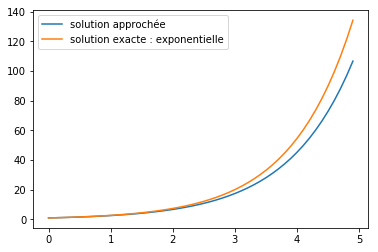

erreur relative maximale :
0.205


In [5]:
x0= 1
dt=0.1
t0, tf= 0, 5
t, x = solve_euler_explicit(f, x0, dt, t0, tf)
plt.plot(t,x,label="solution approchée")
plt.plot(t,np.exp(t),label="solution exacte : exponentielle")
plt.legend()
plt.show()

J=int((tf-t0)/dt)
liste = [abs(x[j]-np.exp(t[j]))/np.exp(t[j]) for j in range (J)]
print("erreur relative maximale :")
print("%.3f" % max(liste))

On constate que l'approximation d'Euler n'est pas performante, l'erreur augmente avec le temps et risque de diverger.
On peut cependant illustrer la convergence de cette méthode en tracant l'erreur maximale en fonction de dt.

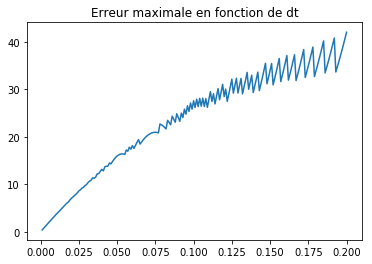

In [6]:
Dt=[0.001*i for i in range (1,201)]
erreur_euler=[]

for i in range (200):
    J=int((tf-t0)/Dt[i])
    t,x=solve_euler_explicit(f, x0, Dt[i], t0, tf)
    e=[abs(x[j]-np.exp(t[j])) for j in range (J)]
    erreur_euler.append(max(e))

plt.plot(Dt,erreur_euler)
plt.title("Erreur maximale en fonction de dt")
plt.show()

Visuellement, le max de l'erreur maximale tend vers 0 quand dt tend vers 0: la méthode d'Euler semble donc bien convergente. La convergence semble bien d'ordre 1, puisque la courbe peut être majorée par une fonction linéaire.

#### Equation de l'oscillateur harmonique non amorti

In [5]:
k,m=2,1
def g(x):
    return(np.array([x[1],-(k/m)*x[0]]))

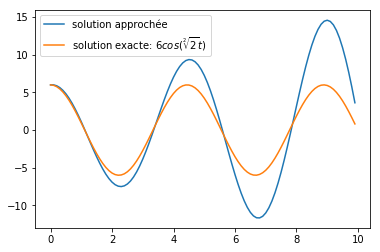

erreur relative maximale :
1.425


In [8]:
x0=np.array([6,0])
t0, tf= 0,10
dt=0.1
t, x = solve_euler_explicit(g, x0, dt, t0, tf)

J=int((tf-t0)/dt)
plt.plot(t, [x[i][0] for i in range (J)],label="solution approchée")
plt.plot(t,[(6*np.cos(sqrt(k/m)*t[j])) for j in range (J)],label="solution exacte: $6 cos(\sqrt[2]{2} t)$")
plt.legend()
plt.show()

J=int((tf-t0)/dt)
liste = [abs(x[j][0]-6*np.cos(sqrt(k/m)*t[j]))/6*np.cos(sqrt(k/m)*t[j]) for j in range (J)]
print("erreur relative maximale :")
print ("%.3f" % max(liste))

Là encore, l'erreur semble diverger. Si on trace la solution approchée et la solution exacte pour des temps longs, l'erreur devient inacceptable :

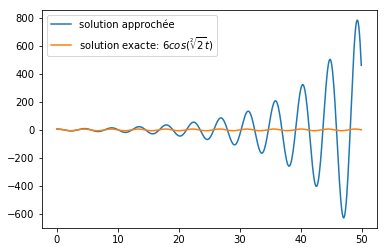

erreur relative maximale :
120.540


In [9]:
tf=50
t, x = solve_euler_explicit(g, x0, dt, t0, tf)

J=int((tf-t0)/dt)
plt.plot(t, [x[i][0] for i in range (J)],label="solution approchée")
plt.plot(t,[(6*np.cos(sqrt(k/m)*t[j])) for j in range (J)],label="solution exacte: $6 cos(\sqrt[2]{2} t)$")
plt.legend()
plt.show()

J=int((tf-t0)/dt)
liste = [abs(x[j][0]-6*np.cos(sqrt(k/m)*t[j]))/6*np.cos(sqrt(k/m)*t[j]) for j in range (J)]
print("erreur relative maximale :")
print ("%.3f" % max(liste))

Illustrons la convergence de la méthode d'Euler :

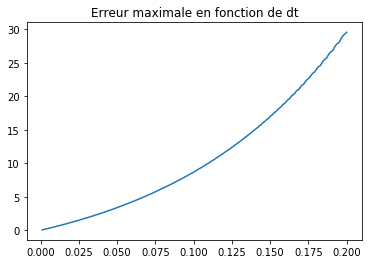

In [10]:
tf= 10

Dt=[0.001*i for i in range (1,201)]
erreur_euler_2=[]

for i in range (200):
    J=int((tf-t0)/Dt[i])
    t,X=solve_euler_explicit(g, x0, Dt[i], t0, tf)
    x=[X[j][0] for j in range(J)]
    e=[abs(x[j]-6*np.cos(sqrt(k/m)*t[j])) for j in range (J)]
    erreur_euler_2.append(max(e))

plt.plot(Dt,erreur_euler_2)
plt.title("Erreur maximale en fonction de dt")
plt.show()

### Schéma d'ordre 2 : Méthode de Heun explicite

In [4]:
def solve_heun_explicit(f, x0, dt, t0, tf):
    J= int((tf-t0)/dt)
    t=[t0+j*dt for j in range (J)]
    x=[x0]
    for j in range (1,J):
        x.append(x[j-1]+dt/2*(f(x[j-1]) + f(x[j-1]+dt*f(x[j-1]))))
    return t, x 

#### Fonction exponentielle

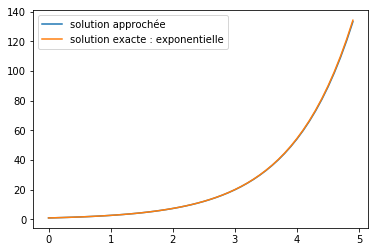

erreur relative maximale :
0.008


In [12]:
x0= 1
t0, tf= 0, 5
dt=0.1
t, x = solve_heun_explicit(f, x0, dt, t0, tf)
plt.plot(t,x,label="solution approchée")
plt.plot(t,np.exp(t),label="solution exacte : exponentielle")
plt.legend()
plt.show()

J= int((tf-t0)/dt)
liste = [abs(x[j]-np.exp(t[j]))/np.exp(t[j]) for j in range (J)]
print("erreur relative maximale :")
print ("%.3f" % max(liste))

Pour le même dt (0.1), on observe que la méthode de Heun est bien plus précise que la méthode d'Euler: les courbes de la solution approchée et de la solution exacte semblent superposées.

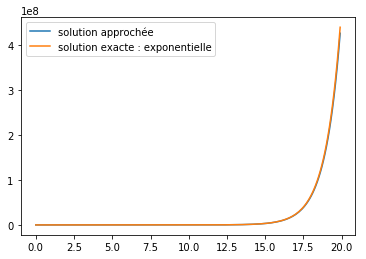

erreur relative maximale :
0.030


In [13]:
tf= 20
t, x = solve_heun_explicit(f, x0, dt, t0, tf)
plt.plot(t,x,label="solution approchée")
plt.plot(t,np.exp(t),label="solution exacte : exponentielle")
plt.legend()
plt.show()

J= int((tf-t0)/dt)
liste = [abs(x[j]-np.exp(t[j]))/np.exp(t[j]) for j in range (J)]
print("erreur relative maximale :")
print ("%.3f" % max(liste))

Même pour des temps longs, l'approximation est précise : l'erreur ne semble pas diverger.

Illustrons maintenant la convergence du schéma de Heun.

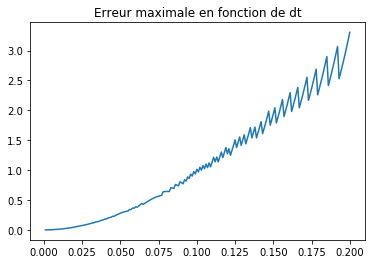

In [14]:
tf=5
Dt=[0.001*i for i in range (1,201)]
erreur_heun=[]

for i in range (200):
    J=int((tf-t0)/Dt[i])
    t,x=solve_heun_explicit(f, x0, Dt[i], t0, tf)
    e=[abs(x[j]-np.exp(t[j])) for j in range (J)]
    erreur_heun.append(max(e))

plt.plot(Dt,erreur_heun)
plt.title("Erreur maximale en fonction de dt")
plt.show()

La convergence semble être d'ordre 2 car la courbe peut être majorée, voire approximée, par un monôme d'ordre 2.

Si on trace le rapport des erreurs maximales (Heun sur Euler) en fonction de dt, on obtient une fonction quasi linéaire : cela confirme la que le schéma de Heun a une convergence dont l'ordre augmente de 1 par rapport à celui d'Euler. 

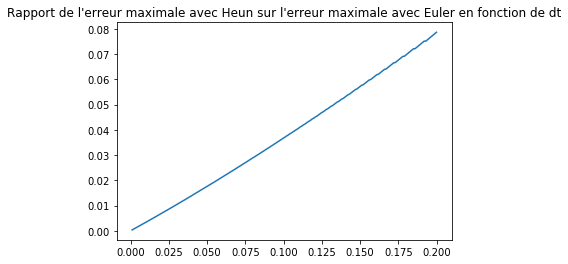

In [15]:
rapport_erreurs=[erreur_heun[i]/erreur_euler[i] for i in range(200)]
plt.plot(Dt, rapport_erreurs)
plt.title("Rapport de l'erreur maximale avec Heun sur l'erreur maximale avec Euler en fonction de dt")
plt.show()

#### Equation de l'oscillateur harmonique non amorti

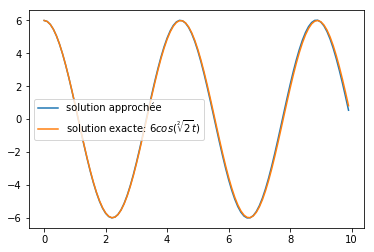

erreur relative maximale :
0.021


In [16]:
x0=np.array([6,0])
t0, tf= 0,10
dt=0.1
t, x = solve_heun_explicit(g, x0, dt, t0, tf)

J=int((tf-t0)/dt)
plt.plot(t, [x[i][0] for i in range (J)],label="solution approchée")
plt.plot(t,[(6*np.cos(sqrt(k/m)*t[j])) for j in range (J)],label="solution exacte: $6 cos(\sqrt[2]{2} t)$")
plt.legend()
plt.show()

J=int((tf-t0)/dt)
liste = [abs(x[j][0]-6*np.cos(sqrt(k/m)*t[j]))/6*np.cos(sqrt(k/m)*t[j]) for j in range (J)]
print("erreur relative maximale :")
print ("%.3f" % max(liste))

On consatate une fois de plus la meilleure précision de la méthode de Heun par rapport à celle d'Euler, et cela même pour des temps longs :

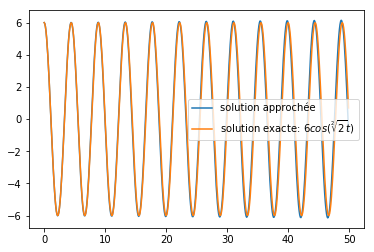

erreur relative maximale :
0.118


In [17]:
tf=50
t, x = solve_heun_explicit(g, x0, dt, t0, tf)

J=int((tf-t0)/dt)
plt.plot(t, [x[i][0] for i in range (J)],label="solution approchée")
plt.plot(t,[(6*np.cos(sqrt(k/m)*t[j])) for j in range (J)],label="solution exacte: $6 cos(\sqrt[2]{2} t)$")
plt.legend()
plt.show()

J=int((tf-t0)/dt)
liste = [abs(x[j][0]-6*np.cos(sqrt(k/m)*t[j]))/6*np.cos(sqrt(k/m)*t[j]) for j in range (J)]
print("erreur relative maximale :")
print ("%.3f" % max(liste))

Illustrons la convergence d'ordre 2 :

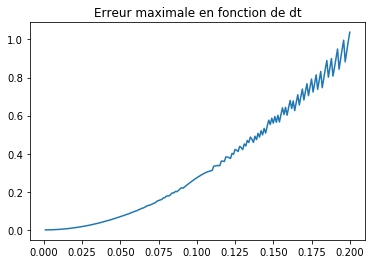

In [18]:
tf=10

Dt=[0.001*i for i in range (1,201)]
erreur_heun_2=[]

for i in range (200):
    J=int((tf-t0)/Dt[i])
    t,X=solve_heun_explicit(g, x0, Dt[i], t0, tf)
    x=[X[j][0] for j in range(J)]
    e=[abs(x[j]-6*np.cos(sqrt(k/m)*t[j])) for j in range (J)]
    erreur_heun_2.append(max(e))

plt.plot(Dt,erreur_heun_2)
plt.title("Erreur maximale en fonction de dt")
plt.show()

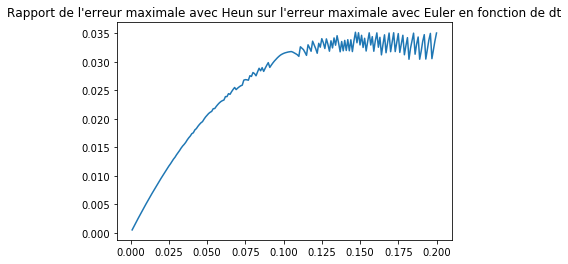

In [19]:
rapport_erreurs_2=[erreur_heun_2[i]/erreur_euler_2[i] for i in range(200)]
plt.plot(Dt, rapport_erreurs_2)
plt.title("Rapport de l'erreur maximale avec Heun sur l'erreur maximale avec Euler en fonction de dt")
plt.show()

Le rapport des erreurs (Heun sur Euler) est majoré par une fontion linéaire.

## Adaptation du pas de temps

### Question 1

Soit j tel que $0 \leq j \leq J-1$ et soit $\tilde{x}$ la solution du problème de Cauchy :
$$\dot{y}=f(t,y), y(t_{j})=x^{j}$$



En appliquant la formule de Taylor à l'ordre 2 en $t_{j}$ à $t_{j+1}$ à $\tilde{x}$ (on a le droit puisque $f$ est $C^1$ donc $\tilde{x}$ est deux fois dérivable) on obtient :

\begin{align}
\tilde{x}(t_{j+1})&=\tilde{x}(t_{j})+\Delta t_{j}  \tilde{x}'(t_{j}) + \frac{\Delta t _{j}^2}{ 2}  \tilde{x}''(t_{j}) + o(\Delta t_{j} ^2) \notag \\
&=x^{j} + \Delta t _{j} f(t_{j},\tilde{x}(t_{j})) + \frac{\Delta t _{j} ^2}{2} (\partial _{1} f(t_{j},x^{j}) +  \tilde{x}' (t_{j}) \partial _{2} f(t_{j},x^{j})) + o(\Delta t_{j} ^2) \notag \\
&=x^{j} + \Delta t _{j} f(t_{j},x^{j})) + \frac{\Delta t _{j} ^2}{2} (\partial _{1} f(t_{j},x^{j}) + f(t_{j},x^{j}) \partial _{2} f(t_{j},x^{j})) + o(\Delta t_{j} ^2) 
\end{align}

Or on a d'après la formalution intégrale de la solution : 
$$\tilde{x}(t)=x^{j}+\int_{t_{j}}^{t} f(\tilde{x}(s),s) ds$$ 

D'où :
$$\tilde{x}(t_{j+1})=e^{j+1}+x^{j+1}$$

Ainsi : 
\begin{align}
e^{j+1}&=x^{j}-x^{j+1}+\Delta t _ {j} f (t_{j},x^{j})+ \frac{\Delta t _{j} ^2}{2} (\partial _{1} f(t_{j},x^{j}) + f(t_{j},x^{j}) \partial _{2} f(t_{j},x^{j})) + o(\Delta t_{j} ^2) \notag \\
&=\frac{\Delta t _{j} ^2}{2} (\partial _{1} f(t_{j},x^{j}) +  f(t_{j},x^j) \partial _{2} f(t_{j},x^{j})) + o(\Delta t_{j} ^2)
\end{align}

D'autre part on a en appliquant la formule de Taylor à l'orde 1 à f (puisque $f$ est $C^1$): 
\begin{align}
f(t_{j+1},x^{j+1})-f(t_{j},x^{j})&=f(t_{j}+\Delta t _{j},x^{j}+\Delta t _{j} f(t_{j},x^{j}))-f(t_{j},x^{j})\notag \\
&=\Delta t_{j} \partial _{1} f(t_{j},x^{j}) + \Delta t_{j}f(t_{j},x^{j}) \partial _{2} f(t_{j},x^{j}) + o(\Delta t _{j})
\end{align}
On a enfin : 
$$e^{j+1}= \frac{\Delta t _ {j}}{2} (f(t_{j+1},x^{j+1})-f(t_{j},x^{j})) + o(\Delta t _{j} ^2)$$

### Question 2

On a : 
$$e^{j+1}=\frac{\Delta t _{j} ^2}{2} (\partial _{1} f(t_{j},x^{j}) +  f(t_{j},x^j) \partial _{2} f(t_{j},x^{j})) + o(\Delta t_{j} ^2) $$
D'où on a bien : 
$$e^{j+1}=O(\Delta t _{j} ^2)$$

In [7]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs)

On se fixe un pas maximal et un pas minimal  
On initialise le pas à $\frac{dtmax}{10}$ de manière arbitraire.  
La première boucle permet de calculer les valeurs successives à mettre dans xs et ts.  
La deuxième boucle sert à trouver un $\Delta t _{j}$ qui permet de diminuer l'erreur au fur et à mesure des itérations et donc d'adapter le pas.  
La condition ti < dtmax permet de donner une condition d'arrêt pour la boucle. Ainsi on recalcule dt et les prochaines valeurs à enregistrer à l'aide de la méthode montrer en question 4 avec l'erreur ratio_abs_error jusqu'à ce que le temps depuis le dernier enregistrement soit supérieur à dtmax.   

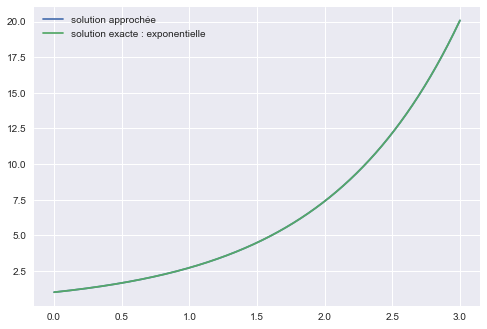

Temps d'exécution : 0.3905372619628906 secondes ---
erreur relative maximale :
0.0001499738


In [8]:
t0=0
t_f=3
x0=1
dt=10**(-4)

start_time=time.time() 

t, x = solve_euler_explicit(f, x0, dt, t0, t_f)

plt.plot(t,x,label="solution approchée")
plt.plot(t,np.exp(t),label="solution exacte : exponentielle")
plt.legend()
plt.show()

print("Temps d'exécution : %s secondes ---" % (time.time() - start_time ))

J= len(x)
liste = [abs(x[j]-np.exp(t[j]))/np.exp(t[j]) for j in range (J)]
print("erreur relative maximale :")
print ("%.10f" % max(liste))

In [31]:
plt.close()

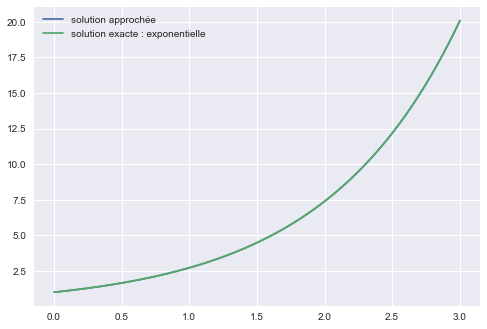

Temps d'exécution : 0.42180490493774414 secondes ---
erreur relative maximale :
0.0007756635


In [10]:
t0=0
t_f=3
x0=1
def f (x):
    return (x)

start_time=time.time() 

t, x = solve_ivp_euler_explicit_variable_step(f,t0,x0,t_f,1e-16, 1e-3, atol = 1e-6)

plt.plot(t,x,label="solution approchée")
plt.plot(t,np.exp(t),label="solution exacte : exponentielle")
plt.legend()
plt.show()

print("Temps d'exécution : %s secondes ---" % (time.time() - start_time ))

J= len(x)
liste = [abs(x[j]-np.exp(t[j]))/np.exp(t[j]) for j in range (J)]
print("erreur relative maximale :")
print ("%.10f" % max(liste))

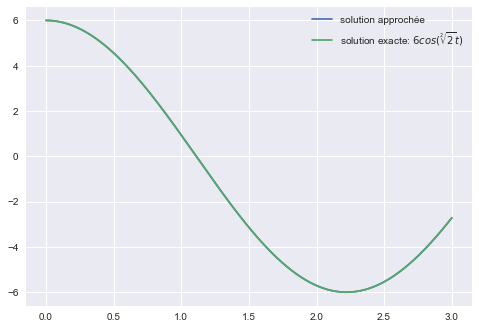

Temps d'exécution : 0.9864187240600586 secondes ---
erreur relative maximale:
0.0002275829
erreur absolue maximale:
0.0013953452


In [11]:
k,m=2,1

x0=np.array([6,0])
t0, tf=0,3
dt=10**(-4)

start_time=time.time() 

t, x = solve_euler_explicit(g, x0, dt, t0, t_f)

J=len(t)

xs=[x[i][0] for i in range(J)]

plt.plot(t,xs,label="solution approchée")
plt.plot(t,[(6*np.cos(sqrt(k/m)*t[j])) for j in range (J)],label="solution exacte: $6 cos(\sqrt[2]{2} t)$")
plt.legend()
plt.show()

print("Temps d'exécution : %s secondes ---" % (time.time() - start_time ))

liste = [abs((xs[j]-6*np.cos(sqrt(k/m)*t[j]))/6*np.cos(sqrt(k/m)*t[j])) for j in range (J)]
print("erreur relative maximale:")
print ("%.10f" % max(liste))

listea = [abs(xs[j]-6*np.cos(sqrt(k/m)*t[j])) for j in range (J)]
print("erreur absolue maximale:")
print ("%.10f" % max(listea))

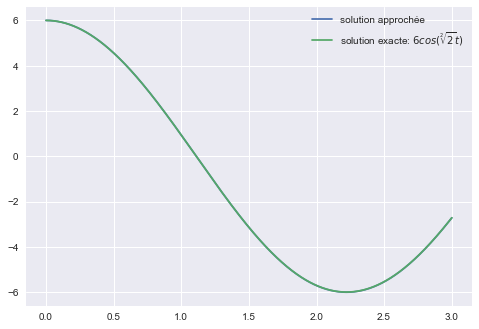

Temps d'exécution : 0.6561267375946045 secondes ---
erreur relative maximale:
0.0009769955
erreur absolue maximale:
0.0059771573


In [12]:
k,m=2,1

x0=np.array([6,0])
t0, tf=0,3

start_time=time.time() 

t, x = solve_ivp_euler_explicit_variable_step(g,t0,x0,t_f,dtmin = 1e-16, dtmax = 1e-3, atol = 1e-6)

J=len(t)

xs=[x[i][0] for i in range(J)]

plt.plot(t,xs,label="solution approchée")
plt.plot(t,[(6*np.cos(sqrt(k/m)*t[j])) for j in range (J)],label="solution exacte: $6 cos(\sqrt[2]{2} t)$")
plt.legend()
plt.show()

print("Temps d'exécution : %s secondes ---" % (time.time() - start_time ))

liste = [abs((xs[j]-6*np.cos(sqrt(k/m)*t[j]))/6*np.cos(sqrt(k/m)*t[j])) for j in range (J)]
print("erreur relative maximale:")
print ("%.10f" % max(liste))

listea = [abs(xs[j]-6*np.cos(sqrt(k/m)*t[j])) for j in range (J)]
print("erreur absolue maximale:")
print ("%.10f" % max(listea))

Sur le cas des deux équations différentielle, avec la même erreur relative, les temps sont du même ordre de grande avec la méthode d'euler à pas constant et à pas adaptatif. 